In [1]:
import sys
import numpy as np
import pandas as pd
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools, QED, Descriptors, rdMolDescriptors
%matplotlib inline
print(rdBase.rdkitVersion)

AttributeError: module 'numpy' has no attribute 'ndarray'

In [2]:
df = PandasTools.LoadSDF('/home/huabei/soft_folder/smtr_data/Dock/SM/fda.sdf')
print(len(df))
df.head()

NameError: name 'PandasTools' is not defined

In [3]:
data = df[['zinc_id', 'ROMol']]
data.head()

NameError: name 'df' is not defined

In [8]:
#Lipinski: Rule of five
def rule_of_five(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    psa = Descriptors.TPSA(m)
    if (mw <= 500 and logp <= 5 and hbd <= 5 and hba <= 10):
        return 1
    else:
        return 0

In [9]:
#Rule of Four
def rule_of_four(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    rings = AllChem.CalcNumRings(m)
    if (mw >= 400 and logp >= 4 and rings >= 4 and hba >= 4):
        return 1
    else:
        return 0

In [10]:
#Rule of three
def rule_of_three(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    if (mw <= 300 and logp <= 3 and hbd <= 3 and hba <= 3 and rotatable_bonds <= 3):
        return 1
    else:
        return 0

In [11]:
#Ghose Filter
def ghose_filter(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    NumAtoms= Chem.rdchem.Mol.GetNumAtoms(m)
    mol_refractivity = Chem.Crippen.MolMR(m)
    if (mw >= 160 and mw <= 480 and logp >= 0.4 and logp <= 5.6 and NumAtoms >= 20 and NumAtoms <= 70 and mol_refractivity >= 40 and mol_refractivity <= 130):
        return 1
    else:
        return 0

In [12]:
# Veber Filter
def veber_filter(m):
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    psa = Descriptors.TPSA(m)
    if (rotatable_bonds <= 10 and psa <= 140):
        return 1
    else:
        return 0

In [13]:
# REOS Filter
def reos_filter(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    formal_charge = Chem.rdmolops.GetFormalCharge(m)
    NumHeavyAtom = Chem.rdchem.Mol.GetNumHeavyAtoms(m)
    rings = AllChem.CalcNumRings(m)
    if (mw >= 200 and mw <= 500 and logp >= int(0 - 5) and logp <= 5 and hbd >= 0 and hbd <= 5 and hba >= 0 and hba <= 10 and 
        formal_charge >= int(0-2) and formal_charge <= 2 and rotatable_bonds >= 0 and rotatable_bonds <= 8 and NumHeavyAtom >= 15 and NumHeavyAtom <= 50):
        return 1
    else:
        return 0         

/tmp/ipykernel_3811/535821197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ro3'] = data.ROMol.map(rule_of_three)


,zinc_id,ROMol,Ro3,Ro4,Lipinski,Ghose Filter,Veber Filter,REOS Filter,QED
0,ZINC000001530427,,0,0,1,0,1,0,0.392039
1,ZINC000003807804,,0,0,0,1,1,0,0.454545
2,ZINC000000120286,,0,0,0,0,1,0,0.585179
3,ZINC000242548690,,0,0,0,0,0,0,0.162215
4,ZINC000000008492,,1,0,1,0,1,0,0.614103

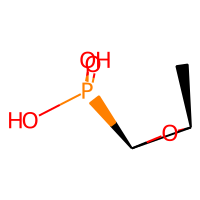
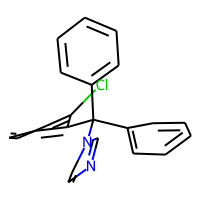
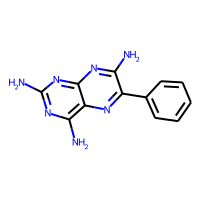
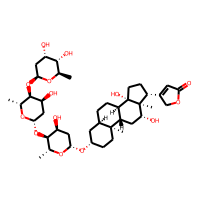
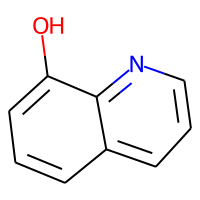

In [14]:
data['Ro3'] = data.ROMol.map(rule_of_three)
data['Ro4'] = data.ROMol.map(rule_of_four)
data['Lipinski'] = data.ROMol.map(rule_of_five)
data['Ghose Filter'] = data.ROMol.map(ghose_filter)
data["Veber Filter"] = data.ROMol.map(veber_filter)
data["REOS Filter"] = data.ROMol.map(reos_filter)
data['QED'] = data.ROMol.map(QED.qed)

data.head()

In [15]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Lipinski', y='QED', data=data)

ModuleNotFoundError: No module named 'seaborn'

In [16]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Ro3', y='QED', data=data)

AttributeError: module 'seaborn' has no attribute 'violinplot'

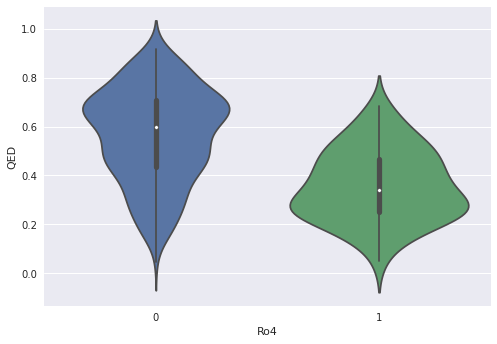

In [13]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Ro4', y='QED', data=data)